# **Installing Necessary Libraries**

In [ ]:
%pip install geneticalgorithm
%pip install pyswarms

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from geneticalgorithm import geneticalgorithm as ga
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import time
import matplotlib.pyplot as plt

# **Fetching Dataset**

In [ ]:
'''
    Breast Cancer Wisconsin (Diagnostic): https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
'''
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X)
print(df[:3])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
d = X_train.shape
print("Training Data Shape:", d)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

      0      1      2       3        4        5       6        7       8   \
0  17.99  10.38  122.8  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.9  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.0  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   

        9   ...     20     21     22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.6  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.8  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.5  1709.0  0.1444  0.4245  0.4504  0.2430   

       28       29  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  

[3 rows x 30 columns]
Training Data Shape: (398, 30)


# **Genetic Algorithm**

### Necessary Fuctions

In [ ]:
# Define the fitness function
def fitness_function(selected_features):
    selected_indices = np.where(selected_features)[0]
    if len(selected_indices) == 0:
        return float('inf')  # Return a large value if no features are selected

    # Train a Ridge Regression model and evaluate its mean squared error
    model = Ridge(alpha=1.0)
    model.fit(X_train[:, selected_indices], y_train)
    y_pred = model.predict(X_test[:, selected_indices])
    mse = mean_squared_error(y_test, y_pred)

    return mse

### Declaring Variables

In [ ]:
iterations = [20, 40, 60, 80, 100]
# iterations = [100, 200, 300, 400, 500]

# Lists to store times, mse and count of feature for iterations
times_ga = []
mse_list_ga = []
feature_count_ga = []

# Create a Genetic Algorithm optimizer
varbound = np.array([[0, 1]] * X_train.shape[1])  # Define bounds for feature selection
algorithm_param = {
    'max_num_iteration': 100,
    'population_size': 10,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None,
    'parents_portion': 0.3
}

### GA Implementation using Ridge Regression

 The best solution found:
 [1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1.]

 Objective function:
 0.04981696530196027


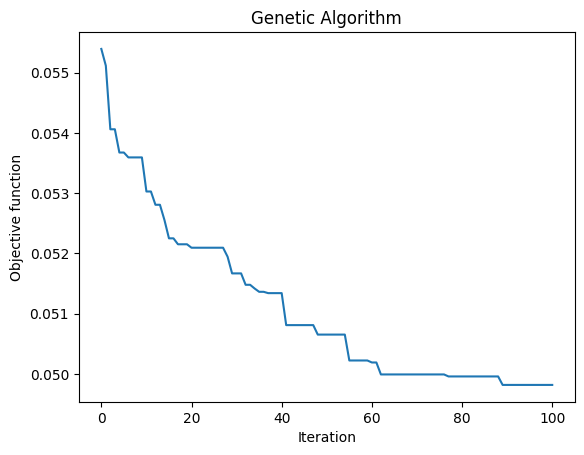



Initial number of features 30
Selected number of features 18
Selected feature indices: [ 0  1  2  5  8  9 10 11 14 15 17 18 20 22 23 24 27 29]
Mean Squared Error on the selected features: 0.04981696530196027
 The best solution found:
 [1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1.]

 Objective function:
 0.050103325170242935


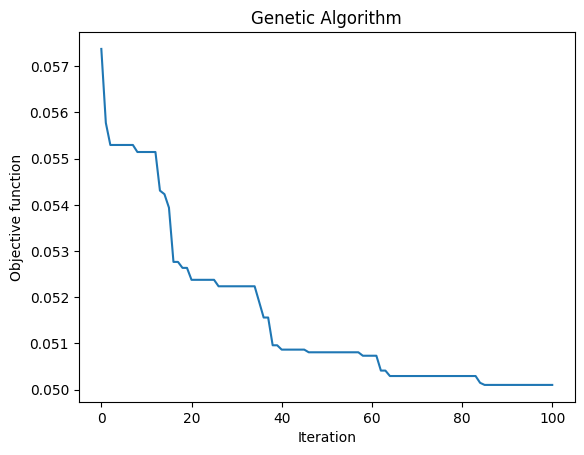



Initial number of features 30
Selected number of features 17
Selected feature indices: [ 0  1  5  6  8  9 10 11 14 16 18 20 22 23 24 27 29]
Mean Squared Error on the selected features: 0.050103325170242935
 The best solution found:
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1.]

 Objective function:
 0.049939198927603186


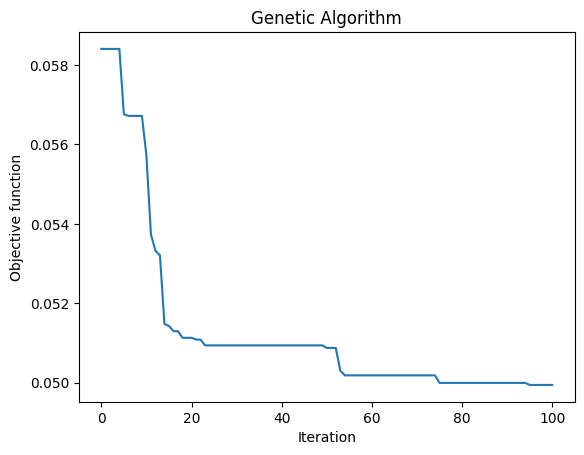



Initial number of features 30
Selected number of features 16
Selected feature indices: [ 1  3  5  8  9 11 12 14 15 17 18 20 23 24 27 29]
Mean Squared Error on the selected features: 0.049939198927603186
 The best solution found:
 [1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1.]

 Objective function:
 0.04984144375982917


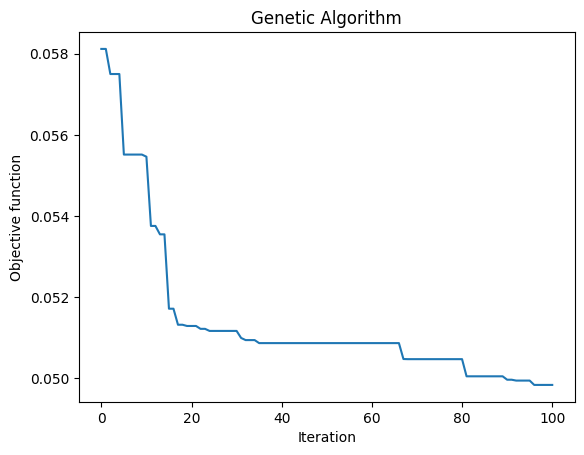



Initial number of features 30
Selected number of features 18
Selected feature indices: [ 0  1  5  8  9 10 11 14 15 16 17 18 20 22 23 24 27 29]
Mean Squared Error on the selected features: 0.04984144375982917
 The best solution found:
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1.]

 Objective function:
 0.04985791053159167


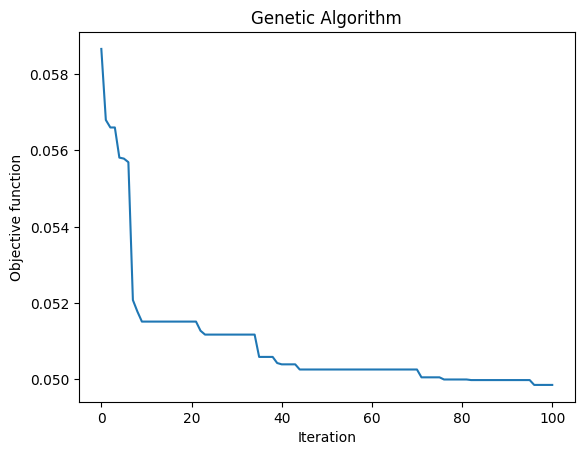



Initial number of features 30
Selected number of features 18
Selected feature indices: [ 1  3  5  8  9 10 11 14 15 16 17 18 20 22 23 24 27 29]
Mean Squared Error on the selected features: 0.04985791053159167


In [ ]:
# Create a Genetic Algorithm optimizer
varbound = np.array([[0, 1]] * X_train.shape[1])  # Define bounds for feature selection

for i in range(len(iterations)):
    start_time = time.time()

    # GA Implementation
    model = ga(function=fitness_function, dimension=X_train.shape[1], variable_type='bool', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

    # Run the optimization
    model.run()

    # Get the selected features
    selected_features = model.output_dict['variable']

    end_time = time.time()

    times_ga.append(end_time - start_time)

    # Print the selected feature indices
    selected_indices = np.where(selected_features)[0]
    print("\n\nInitial number of features", d[1])
    print("Selected number of features", len(selected_indices))
    print("Selected feature indices:", selected_indices)
    # Evaluate Ridge Regression on the selected features
    model = Ridge(alpha=1.0)
    model.fit(X_train[:, selected_indices], y_train)
    y_pred = model.predict(X_test[:, selected_indices])
    mse = mean_squared_error(y_test, y_pred)

    print("Mean Squared Error on the selected features:", mse)

    mse_list_ga.append(mse)
    feature_count_ga.append(len(selected_indices))

### Comparative Analysis

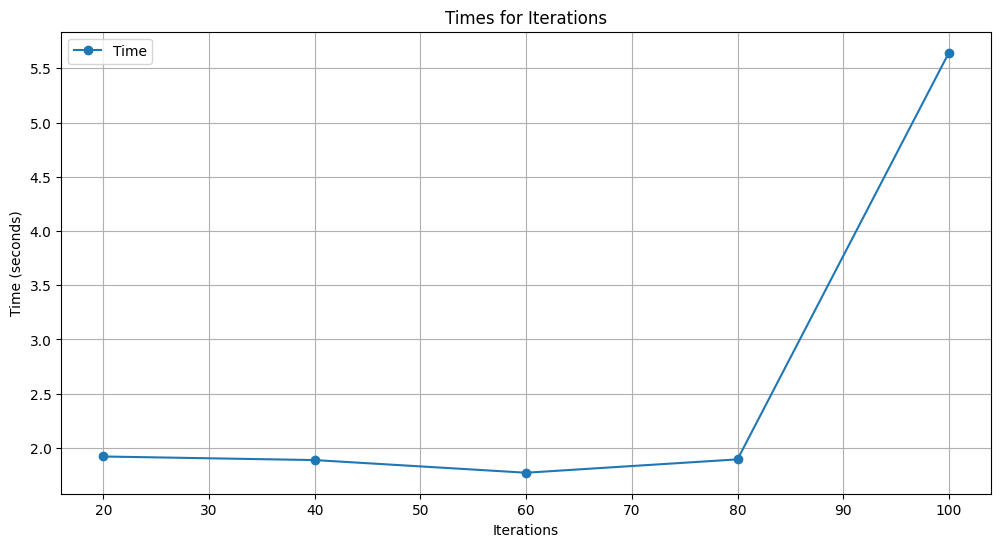

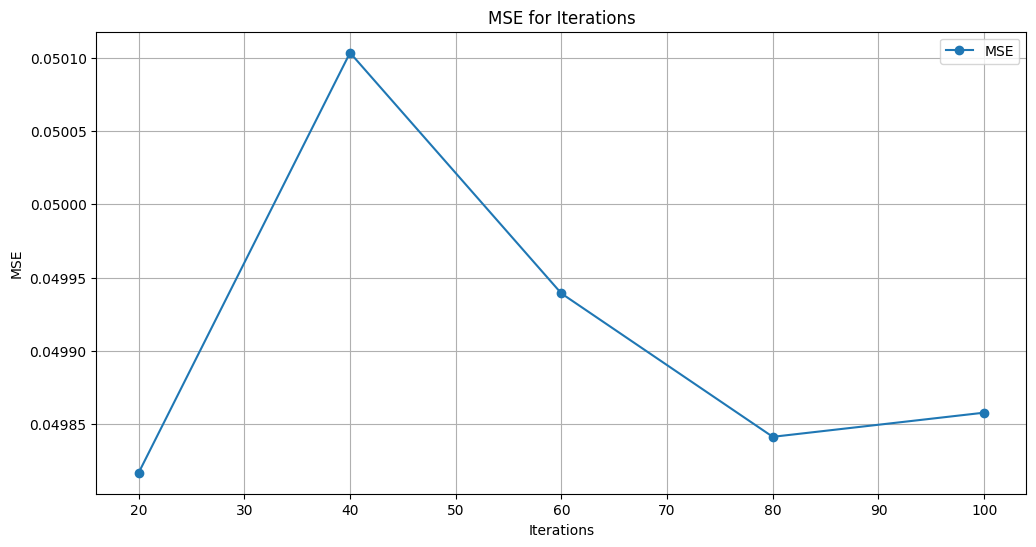

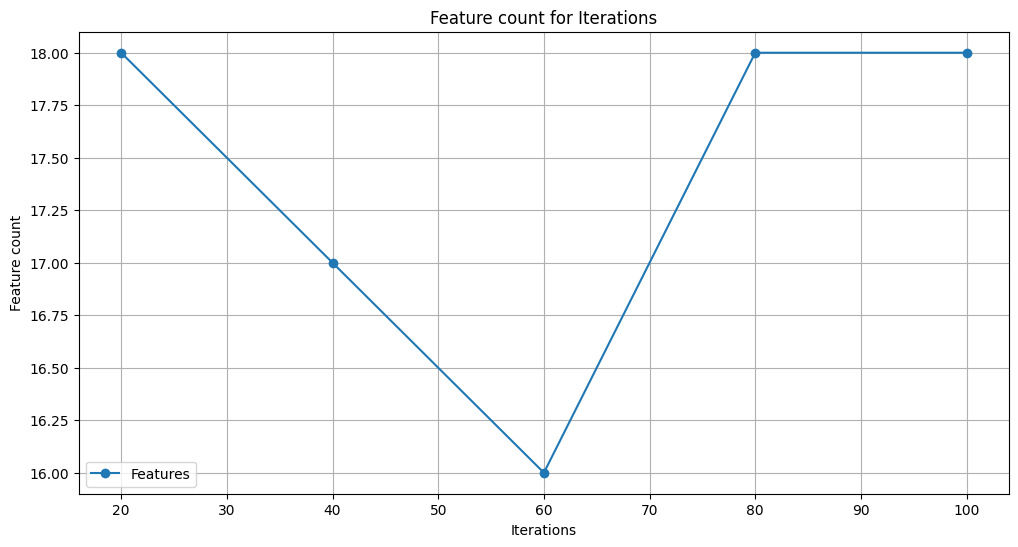

In [ ]:
# Plot for Times for iterations
plt.figure(figsize=(12, 6))
plt.plot(iterations, times_ga, marker='o', label='Time')
plt.xlabel('Iterations')
plt.ylabel('Time (seconds)')
plt.title('Times for Iterations')
plt.legend()
plt.grid()
plt.show()

print("");

# Plot for MSE for iterations
plt.figure(figsize=(12, 6))
plt.plot(iterations, mse_list_ga, marker='o', label='MSE')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE for Iterations')
plt.legend()
plt.grid()
plt.show()

print("");

# Plot for Feature count for iterations
plt.figure(figsize=(12, 6))
plt.plot(iterations, feature_count_ga, marker='o', label='Features')
plt.xlabel('Iterations')
plt.ylabel('Feature count')
plt.title('Feature count for Iterations')
plt.legend()
plt.grid()
plt.show()

# **Particle Swarm Optimization**

### Necessary Fuctions

In [ ]:
# Define the fitness function for Ridge Regression
def ridge_fitness(selected_features):
    selected_indices = np.where(selected_features)[0]
    if len(selected_indices) == 0:
        return float('inf')

    model = Ridge(alpha=1.0)
    model.fit(X_train[:, selected_indices], y_train)
    y_pred = model.predict(X_test[:, selected_indices])
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Create a function for PSO optimization
def optimize_with_iterations(iterations):
    # Create an instance of the PSO optimizer
    optimizer = ps.single.GlobalBestPSO(n_particles=num_particles, dimensions=num_dimensions, options=options)

    start_time = time.time()
    # Optimize for Ridge Regression
    ridge_selected_features = optimizer.optimize(objective_func=ridge_fitness, iters=iterations)
    end_time = time.time()

    return ridge_selected_features, end_time - start_time

### Declaring Variables

In [ ]:
# Set the PSO optimization parameters
num_particles = 10
num_dimensions = X_train.shape[1]

# Create options for PSO optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



# Specify the iterations
iterations_list = [20, 40, 60, 80, 100]

selected_features_list = []
execution_time_list_pso = []
mse_list_pso = []
selected_features_counts_pso = []

### PSO Implementation using Ridge Regression

In [ ]:
for iterations in iterations_list:
    ridge_selected_features, exec_time = optimize_with_iterations(iterations)
    selected_features_list.append(ridge_selected_features)
    execution_time_list_pso.append(exec_time)

    # Convert the tuple to a NumPy array
    ridge_selected_features = np.array(ridge_selected_features)

    # Calculate MSE for the current set of selected features
    selected_indices = np.where(ridge_selected_features.all() > 0.5)[0]
    if len(selected_indices) == 0:
        mse = float('inf')
    else:
        model = Ridge(alpha=1.0)
        model.fit(X_train[:, selected_indices], y_train)
        y_pred = model.predict(X_test[:, selected_indices])
        mse = mean_squared_error(y_test, y_pred)

    mse_list_pso.append(mse)

# Convert the results to NumPy arrays
selected_features_list = np.array(selected_features_list, dtype=object)

# Print selected feature indices and MSE for Ridge Regression
for i, iterations in enumerate(iterations_list):
    ridge_selected_features = []
    k = 0
    for it in selected_features_list[i][1]:
        if(it > 0.5):
            ridge_selected_features.append(k)
        k = k + 1
    print("\nNumber of iterations:", iterations)
    print("Initial number of features:", d[1])
    print("Selected number of features for Ridge Regression:", len(ridge_selected_features))
    selected_features_counts_pso.append(len(ridge_selected_features))
    print("Selected feature indices for Ridge Regression:", ridge_selected_features)
    print("Mean Squared Error:", mse_list_pso[i])


2023-11-20 09:35:53,932 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.0763
2023-11-20 09:35:54,633 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.07633563497746265, best pos: [0.73013304 0.88672043 0.32195353 0.9785732  0.28107957 0.16980649
 0.0011253  0.69779483 0.20825334 0.8314441  0.25722393 0.50056413
 0.32508466 0.71577848 0.40777728 0.50003684 0.57947487 0.59591889
 0.75949304 0.88465703 0.81630526 0.42672821 0.9584459  0.17222553
 0.39840059 0.05754055 0.43191145 0.98936228 0.65430683 0.08625781]
<ipython-input-49-358261d93873>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ridge_selected_features = np.array(ridge


Number of iterations: 20
Initial number of features: 30
Selected number of features for Ridge Regression: 16
Selected feature indices for Ridge Regression: [0, 1, 3, 7, 9, 11, 13, 15, 16, 17, 18, 19, 20, 22, 27, 28]
Mean Squared Error: 0.06066407404030274

Number of iterations: 40
Initial number of features: 30
Selected number of features for Ridge Regression: 17
Selected feature indices for Ridge Regression: [0, 1, 2, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 20, 22, 23, 29]
Mean Squared Error: 0.05706683997340946

Number of iterations: 60
Initial number of features: 30
Selected number of features for Ridge Regression: 14
Selected feature indices for Ridge Regression: [0, 2, 4, 5, 6, 7, 8, 9, 12, 18, 19, 25, 26, 27]
Mean Squared Error: 0.07736443116684173

Number of iterations: 80
Initial number of features: 30
Selected number of features for Ridge Regression: 15
Selected feature indices for Ridge Regression: [0, 3, 4, 5, 10, 11, 12, 14, 17, 18, 20, 23, 25, 26, 27]
Mean Squared Error: 0.0

### Comparative Analysis

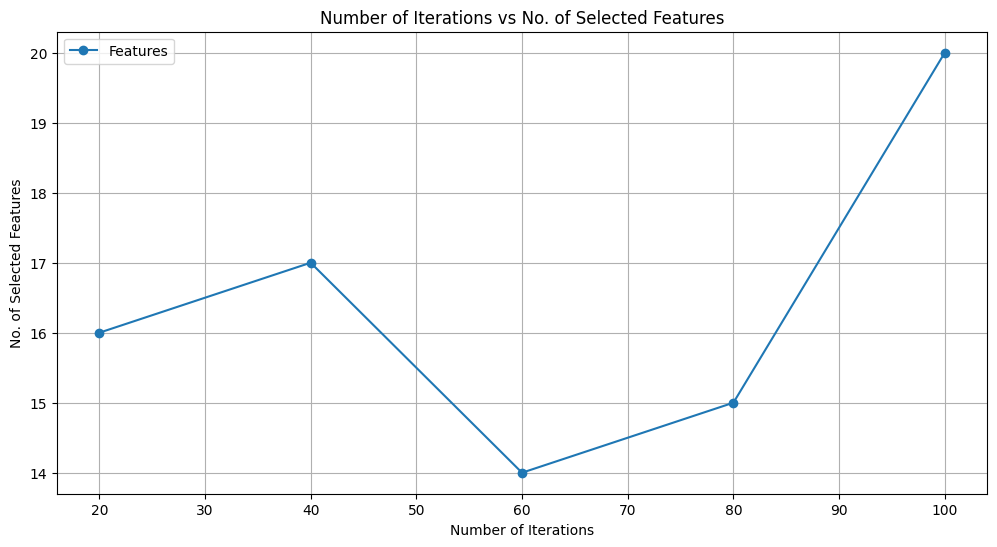

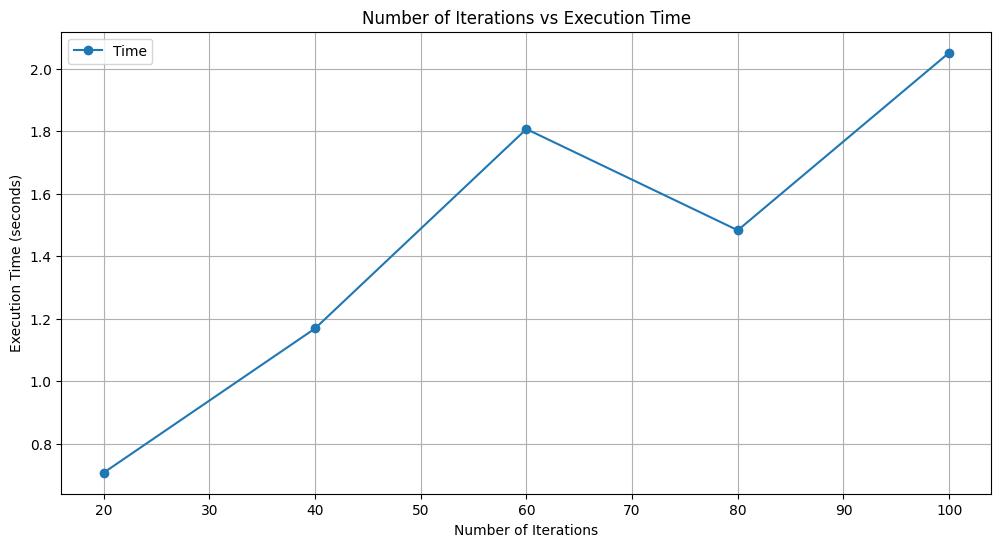

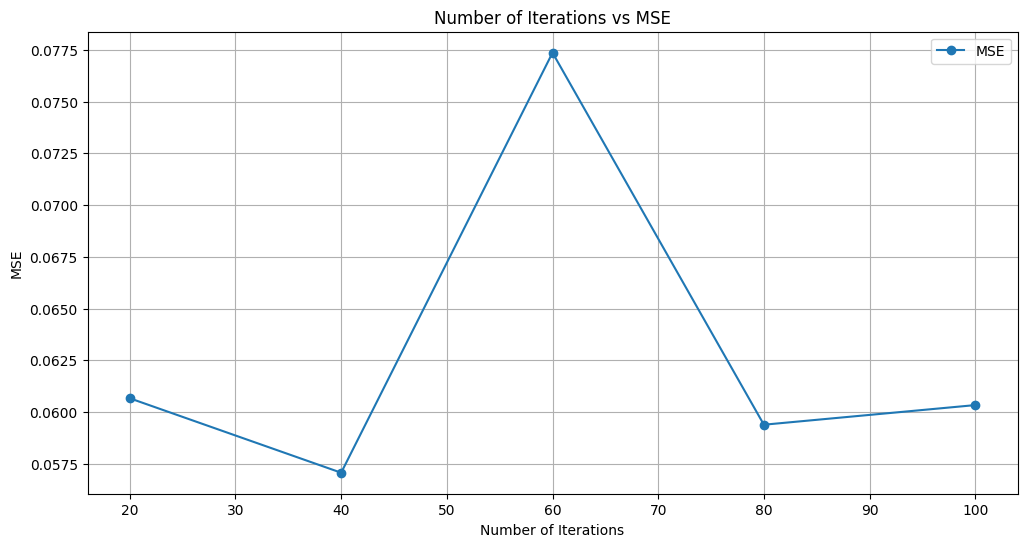

In [ ]:
# Plot the results
# Number of Iterations vs Selected no. of Features
plt.figure(figsize=(12, 6))
plt.plot(iterations_list, selected_features_counts_pso, marker='o', label='Features')
plt.xlabel("Number of Iterations")
plt.ylabel("No. of Selected Features")
plt.title("Number of Iterations vs No. of Selected Features")
plt.legend()
plt.grid()
plt.show()

print("")

# Number of Iterations vs Execution Time
plt.figure(figsize=(12, 6))
plt.plot(iterations_list, execution_time_list_pso, marker='o', label='Time')
plt.xlabel("Number of Iterations")
plt.ylabel("Execution Time (seconds)")
plt.title("Number of Iterations vs Execution Time")
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(iterations_list, mse_list_pso, marker='o', label='MSE')
plt.xlabel("Number of Iterations")
plt.ylabel("MSE")
plt.title("Number of Iterations vs MSE")
plt.legend()
plt.grid()
plt.show()


# **Ant Colony Optimisation**

### Necessary Fuctions

In [ ]:
# Function to initialize pheromone levels
def initialize_pheromone_matrix(num_features):
    return np.ones(num_features)

# Function to select features based on pheromone levels and visibility
def select_features(pheromone, visibility, threshold):
    prob_add = (pheromone ** alpha) * (visibility ** beta)
    selected_features = np.where(prob_add > threshold)[0]
    return selected_features

# Objective function to evaluate the feature subset
def evaluate_subset(X_train, X_test, y_train, y_test, subset):
    clf = Ridge(alpha=1.0, random_state=42)  # Ridge Regression model
    clf.fit(X_train[:, subset], y_train)
    y_pred = clf.predict(X_test[:, subset])
    y_pred = np.round(y_pred)  # Round the predictions for classification
    return accuracy_score(y_test, y_pred)

# Map covariance values to positive values
def map_to_positive_infinity(arr):
    mapped_values = np.exp(arr)
    return mapped_values

### Declaring Variables

In [ ]:
# Define ACO parameters
n_ants = 10
alpha = 10.0
beta = 20.0
rho = 0
num_features = X_train.shape[1]
# num_features_to_select = 10
threshold = 0.0
num_iterations_list = [20, 40, 60, 80, 100]

# Lists to store results for each number of iterations
best_accuracy_list_aco = []
best_subset_list_aco = []
execution_time_list_aco = []
selected_features_counts_aco = []

### ACO Implementation using Ridge Regression

In [ ]:
# Get covariance of features with target
data_with_target = np.column_stack((X, y))
covariance_matrix = np.cov(data_with_target, rowvar=False)[d[1], :d[1]]
visibility = map_to_positive_infinity(covariance_matrix)

for num_iterations in num_iterations_list:
    start_time = time.time()
    n_iterations = num_iterations
    pheromone = initialize_pheromone_matrix(num_features)

    best_subset = []
    best_score = 0.0

    for _ in range(n_iterations):
        for ant in range(n_ants):
            features_selected = select_features(pheromone, visibility, threshold)

            # Evaluate the feature subset
            score = evaluate_subset(X_train, X_test, y_train, y_test, features_selected)

            if score > best_score:
                best_score = score
                best_subset = features_selected

        # Evaporate pheromone
        pheromone *= (1 - rho)

    best_subset = np.unique(best_subset)
    best_accuracy_list_aco.append(best_score)
    best_subset_list_aco.append(best_subset)
    execution_time_list_aco.append(time.time() - start_time)

# Print the results for each number of iterations
for i, num_iterations in enumerate(num_iterations_list):
    print(f"Iterations = {num_iterations}")
    print(f"Best Accuracy: {best_accuracy_list_aco[i]}")
    print(f"Best Feature Subset: {best_subset_list_aco[i]}\n")


for subset in best_subset_list_aco:
    selected_features_counts_aco.append(len(subset))

Iterations = 20
Best Accuracy: 0.9181286549707602
Best Feature Subset: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29]

Iterations = 40
Best Accuracy: 0.9181286549707602
Best Feature Subset: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29]

Iterations = 60
Best Accuracy: 0.9181286549707602
Best Feature Subset: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29]

Iterations = 80
Best Accuracy: 0.9181286549707602
Best Feature Subset: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29]

Iterations = 100
Best Accuracy: 0.9181286549707602
Best Feature Subset: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29]



### Comparative Analysis

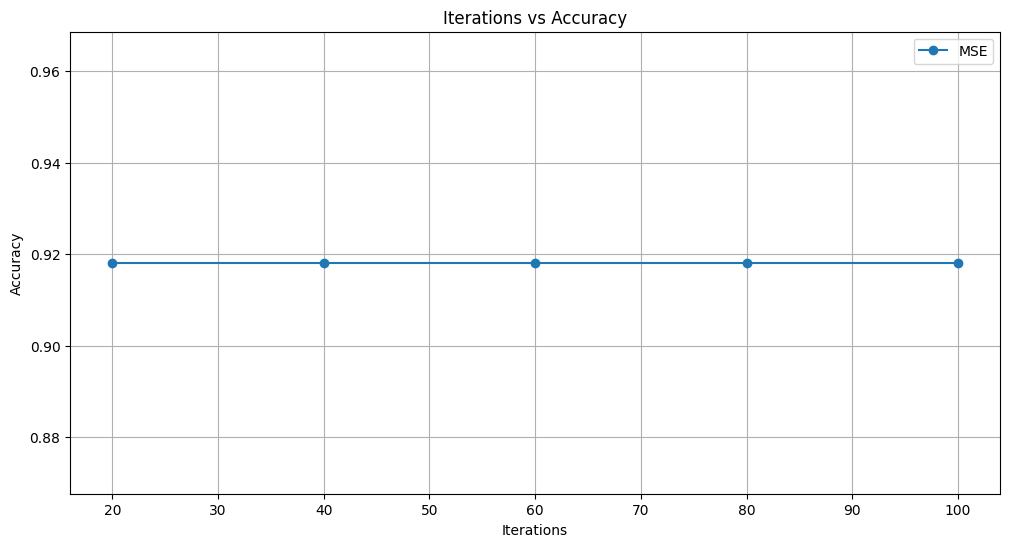

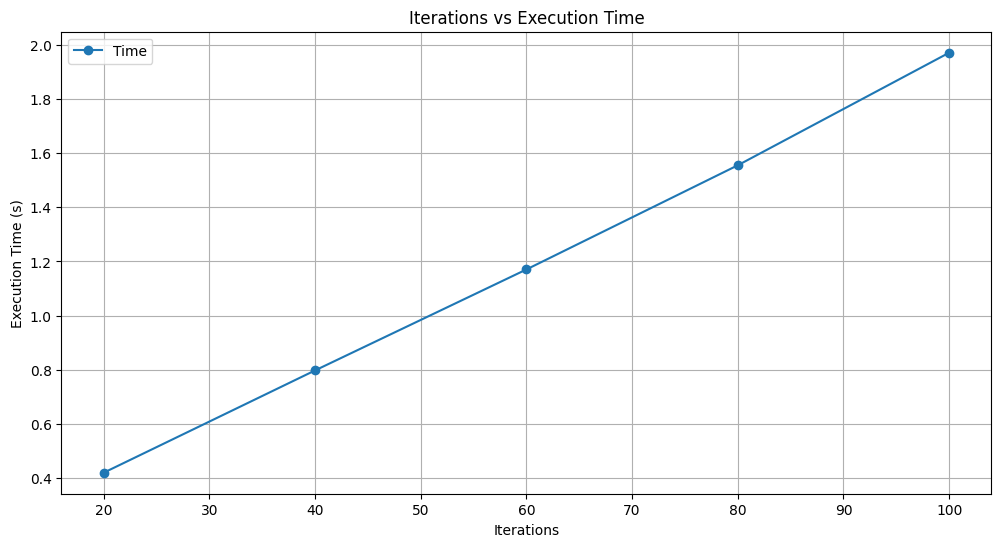

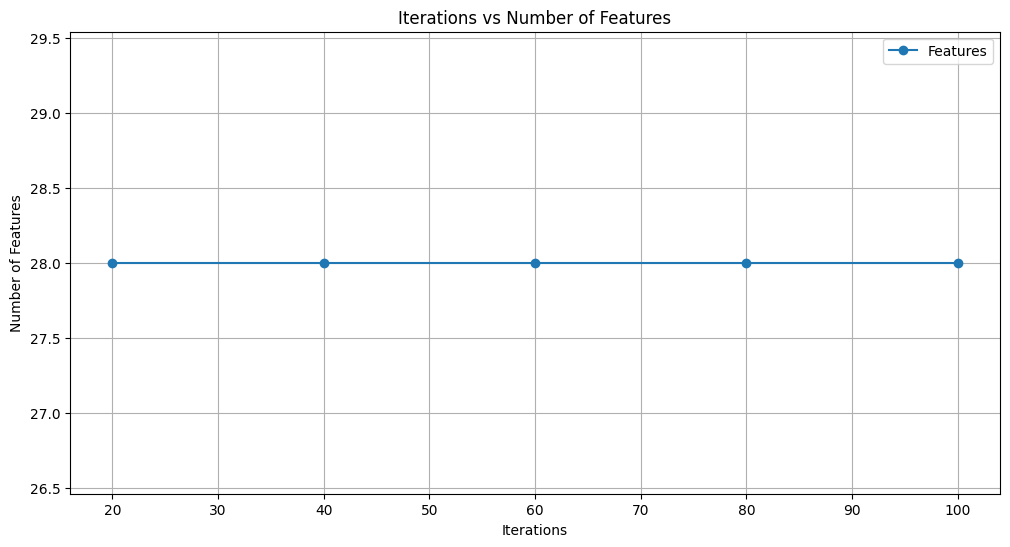

In [ ]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(num_iterations_list, best_accuracy_list_aco, marker='o', label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterations vs Accuracy')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(num_iterations_list, execution_time_list_aco, marker='o', label='Time')
plt.xlabel('Iterations')
plt.ylabel('Execution Time (s)')
plt.title('Iterations vs Execution Time')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(num_iterations_list, selected_features_counts_aco, marker='o', label='Features')
plt.xlabel('Iterations')
plt.ylabel('Number of Features')
plt.title('Iterations vs Number of Features')
plt.legend()
plt.grid()
plt.show()


# **HPSOGA**

### Necessary Fuctions

In [ ]:
def ridge_regression_objective_function(X, y, weights):
    # Create a Ridge regression model
    model = Ridge()

    # Fit the model to the data
    model.fit(X, y)

    # Make predictions on the training data
    y_pred = model.predict(X)

    # Calculate the mean squared error (MSE)
    mse = mean_squraed_error(y, y_pred)

    return mse

def arithmetical_crossover(X1, X2, Pc):
    # Generate a random crossover probability
    crossover_prob = np.random.rand()

    if crossover_prob < Pc:
        # Perform arithmetical crossover
        c1 = np.random.rand()
        c2 = 1 - c1

        X_new = c1 * X1 + c2 * X2
    else:
        # Do not perform crossover
        X_new = X1

    return X_new

def ga_mutation_operator(X, Pm):
    # Mutate each gene with probability Pm
    for i, gene in enumerate(X):
        if np.random.rand() < Pm:
            gene = gene + np.random.normal(0, 1)

    return X


def ga_selection_operator(population, Pc):
    # Perform tournament selection
    selected_indices = []
    for _ in range(len(population)):
        tournament_participants = np.random.choice(len(population), k=2, replace=False)
        winner_index = tournament_participants[np.argmin(population[tournament_participants])]
        selected_indices.append(winner_index)

    # Select the individuals for crossover based on tournament selection
    selected_population = population[selected_indices]

    return selected_population


def count_features(gbest):
    # Threshold value
    threshold = 0.45

    # Creating a boolean mask based on the condition
    mask = gbest > threshold

    # Counting the number of elements above the threshold
    count = np.sum(mask)
    return count


def pso_algorithm(X, y, population, c1, c2, Pc, Pm, Maxitr):
    # Initialize the velocity and position vectors
    V = np.ones_like(population)
    V *= 1
    P = population

    # Initialize the best global solution
    gbest = None
    gbest_fitness = 0.1
    pbest = None

    for itr in range(Maxitr):
        # Calculate the fitness for each particle
        fitness = []
        for particle in P:
            fitness_value = ridge_regression_objective_function(X, y, particle)
            fitness.append(fitness_value)

        # Update the best personal solution (pbest) for each particle
        for i, particle in enumerate(P):
            pbest = particle.copy()
            pbest_fitness = fitness[i]

            if fitness[i] < pbest_fitness:
                pbest = particle
                pbest_fitness = fitness[i]

        # Update the global best solution (gbest)
        if np.min(fitness) < gbest_fitness:
            gbest_index = np.argmin(fitness)
            gbest = P[gbest_index]
            gbest_fitness = np.min(fitness)

        # Update the velocity of each particle
        for i, particle in enumerate(P):
            d1 = np.random.rand(1, 3)
            d2 = np.random.rand(1, 3)
            d1 = random.uniform(0, 1)
            d2 = random.uniform(0, 1)
            V[i] = c1 * V[i] + c2 * d1 * (pbest[i] - particle) + c2 * d2 * (gbest - particle)

        # Update the position of each particle
        for i, particle in enumerate(P):
            P[i] = particle + V[i]

    return gbest

### Declaring Variables

In [ ]:
# Define the hyperparameters
population_size = X.shape[1]  # Number of particles in the population equals number of eatures
c1 = 0.001  # Acceleration constant 1
c2 = 0.001  # Acceleration constant 2
Pc = 0.007  # Crossover probability
Pm = 0.001  # Mutation probability
partno = 5  # Number of partitions
m = 17  # Number of variables in each partition
g = 9  # Number of solutions in each partition
Maxitr = 100  # Maximum number of iterations

# List of iterations
num_iterations = [20, 40, 60, 80, 100]

selected_features_list = []
execution_time_list_hpsoga = []
mse_list_hpsoga = []
selected_features_counts_hpsoga = []

### HPSOGA Implementation using Ridge Regression

In [ ]:
for iteration in num_iterations:
    # Run the hybrid PSO-GA algorithm
    # Apply PSO-GA algorithm to the training data
    population = np.random.rand(population_size, X.shape[1])

    start_time = time.time()

    gbest = pso_algorithm(X, y, population, c1, c2, Pc, Pm, Maxitr)

    execution_time_list_hpsoga.append(time.time() - start_time)
    selected_features_counts_hpsoga.append(count_features(gbest))

    # Evaluate the MSE on the testing data
    y_pred = np.dot(X_test, gbest)
    mse = mean_squraed_error(y_test, y_pred)

    # Append the MSE to the MSE list
    mse_list_hpsoga.append(mse)

# Print the results for each number of iterations
for i, iterations in enumerate(num_iterations):
    print(f"Iterations = {iterations}")
    print(f"Best Accuracy: {mse_list_hpsoga[i]}")
    print(f"Number of Selected Feature: {selected_features_counts_hpsoga[i]}\n")

Iterations = 20
Best Accuracy: 0.5239972347314952
Number of Selected Feature: 16

Iterations = 40
Best Accuracy: 0.5436668015738277
Number of Selected Feature: 15

Iterations = 60
Best Accuracy: 0.564489577564804
Number of Selected Feature: 18

Iterations = 80
Best Accuracy: 0.38745968400402414
Number of Selected Feature: 16

Iterations = 100
Best Accuracy: 0.4601576876533264
Number of Selected Feature: 16



### Comparative Analysis

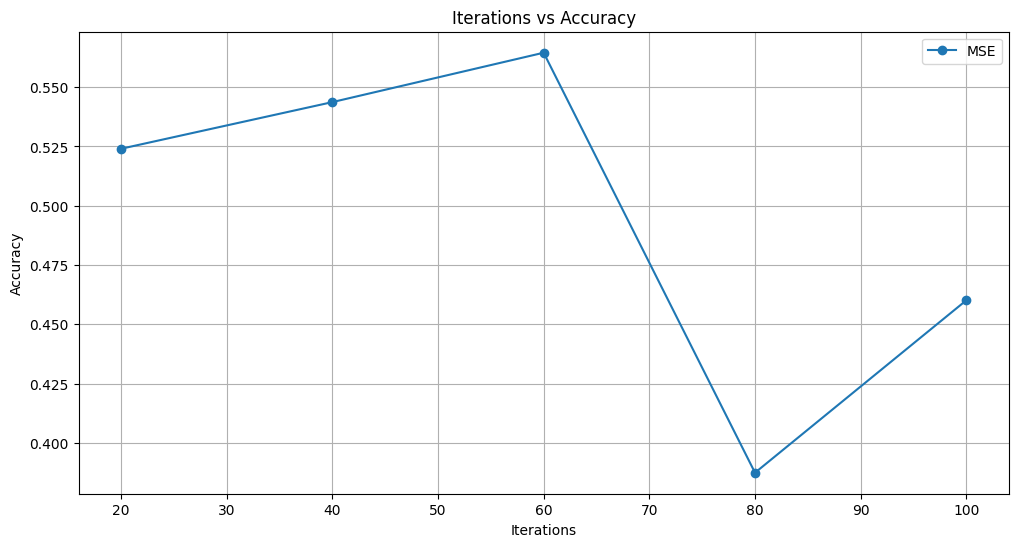

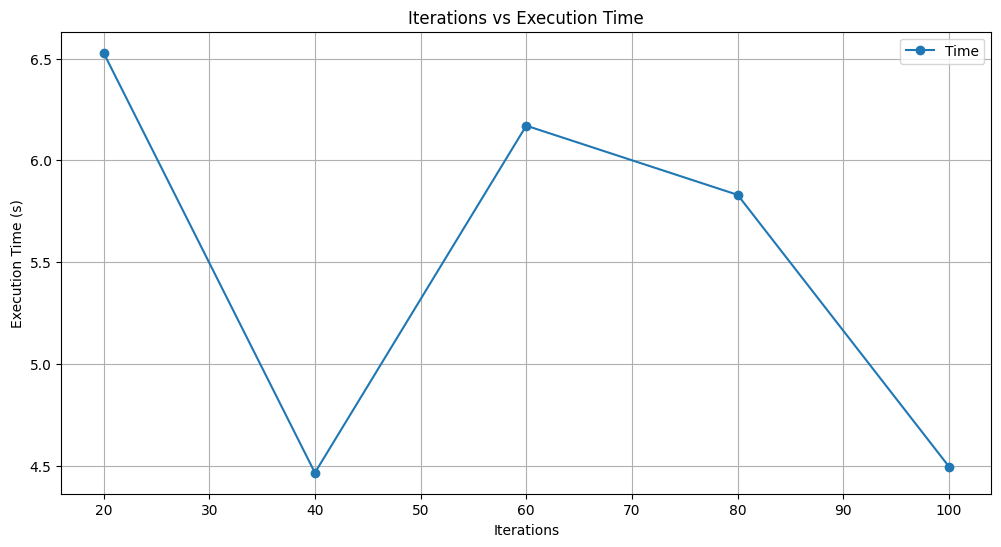

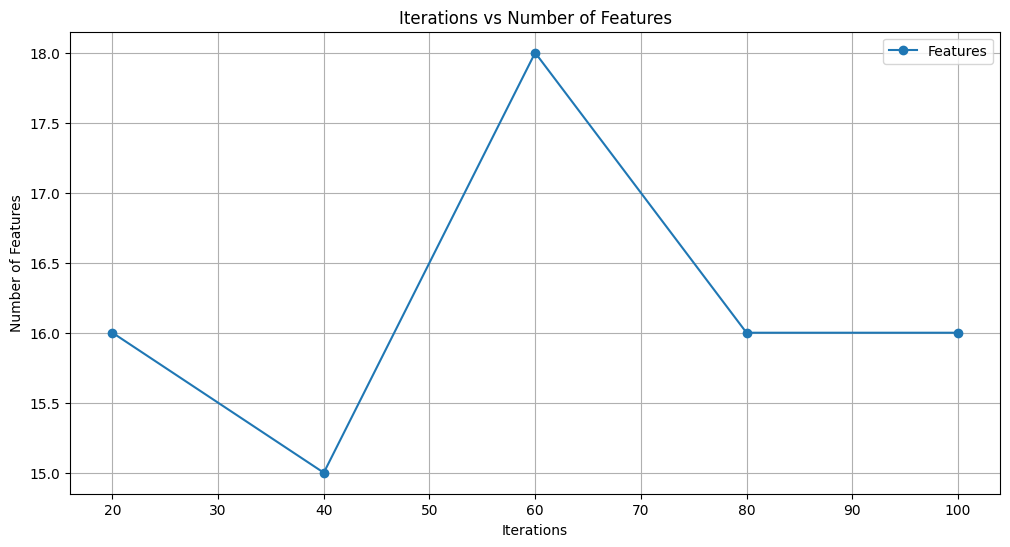

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(num_iterations, mse_list_hpsoga, marker='o', label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterations vs Accuracy')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(num_iterations, execution_time_list_hpsoga, marker='o', label='Time')
plt.xlabel('Iterations')
plt.ylabel('Execution Time (s)')
plt.title('Iterations vs Execution Time')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(num_iterations, selected_features_counts_hpsoga, marker='o', label='Features')
plt.xlabel('Iterations')
plt.ylabel('Number of Features')
plt.title('Iterations vs Number of Features')
plt.legend()
plt.grid()
plt.show()


# **Grey Wolf Optimizer**

### Necessary Fuctions

In [ ]:
def gwo_feature_selection(X, y, num_wolves=10, iterations=100):
    num_samples, num_all_features = X.shape
    alpha, beta, delta = np.zeros(num_all_features), np.zeros(num_all_features), np.zeros(num_all_features)
    fitness_alpha, fitness_beta, fitness_delta = float('inf'), float('inf'), float('inf')

    mse_values = []
    features_selected_over_iterations = []

    for _ in range(iterations):
        for i in range(num_wolves):
            positions = np.random.randint(2, size=num_all_features)

            positions = np.clip(positions, 0, num_all_features - 1)
            wolf_X = X[:, positions]

            ridge = Ridge()
            ridge.fit(wolf_X, y)
            mse = mean_squared_error(y_test, ridge.predict(X_test[:, positions]))

            mse_values.append(mse)
            features_selected_over_iterations.append(sum(positions))

            if mse < fitness_alpha:
                fitness_alpha = mse
                alpha = positions
            elif mse < fitness_beta:
                fitness_beta = mse
                beta = positions
            elif mse < fitness_delta:
                fitness_delta = mse
                delta = positions

        a = 2 - _ * (2 / iterations)  # a decreases linearly from 2 to 0

        for i in range(num_wolves):
            for j in range(num_all_features):
                A1, A2, A3 = 2 * a * np.random.random() - a, 2 * a * np.random.random() - a, 2 * a * np.random.random() - a
                C1, C2, C3 = 2 * np.random.random(), 2 * np.random.random(), 2 * np.random.random()
                D_alpha, D_beta, D_delta = abs(2 * C1 * alpha[j] - positions[j]), abs(2 * C2 * beta[j] - positions[j]), abs(2 * C3 * delta[j] - positions[j])

                positions[j] = (alpha[j] - A1 * D_alpha + beta[j] - A2 * D_beta + delta[j] - A3 * D_delta) / 3

            # Clip positions to valid range
            positions = np.clip(positions, 0, num_all_features - 1)

            ridge = Ridge()
            ridge.fit(X[:, positions], y)
            mse = mean_squared_error(y_test, ridge.predict(X_test[:, positions]))

            if mse < fitness_alpha:
                fitness_alpha = mse
                alpha = positions
            elif mse < fitness_beta:
                fitness_beta = mse
                beta = positions
            elif mse < fitness_delta:
                fitness_delta = mse
                delta = positions

    alpha = np.clip(alpha, 0, num_all_features - 1)
    selected_features = alpha
    return selected_features, mse_values, features_selected_over_iterations

### Declaring Variables

In [ ]:
# Define different numbers of iterations to compare
iterations_list = [20, 40, 60, 80, 100]

# Lists to store data for plots
mse_values_list_gwo = []
features_selected_list_gwo = []
execution_time_list_gwo = []

### Implementing GWO

In [ ]:
for iterations in iterations_list:
    start_time = time.time()
    selected_features, mse_values, features_selected_over_iterations = gwo_feature_selection(X_train, y_train, iterations=iterations)
    end_time = time.time()

    mse_values_list_gwo.append(mse_values[-1])  # Take the last MSE value
    features_selected_list_gwo.append(features_selected_over_iterations[-1])  # Take the last feature count
    execution_time_list_gwo.append(end_time - start_time)

    # Print results
    print(f"Iterations = {iterations}")
    print(f"Best MSE: {mse_values[-1]}")
    print(f"No of features selected: {features_selected_over_iterations[-1]}\n")

Iterations = 20
Best MSE: 0.0892230697594246
No of features selected: 16

Iterations = 40
Best MSE: 0.0892219635998703
No of features selected: 11

Iterations = 60
Best MSE: 0.08922237738289546
No of features selected: 13

Iterations = 80
Best MSE: 0.0892230697594246
No of features selected: 16

Iterations = 100
Best MSE: 0.08922282187594788
No of features selected: 15



### Comparative analysis of GWO

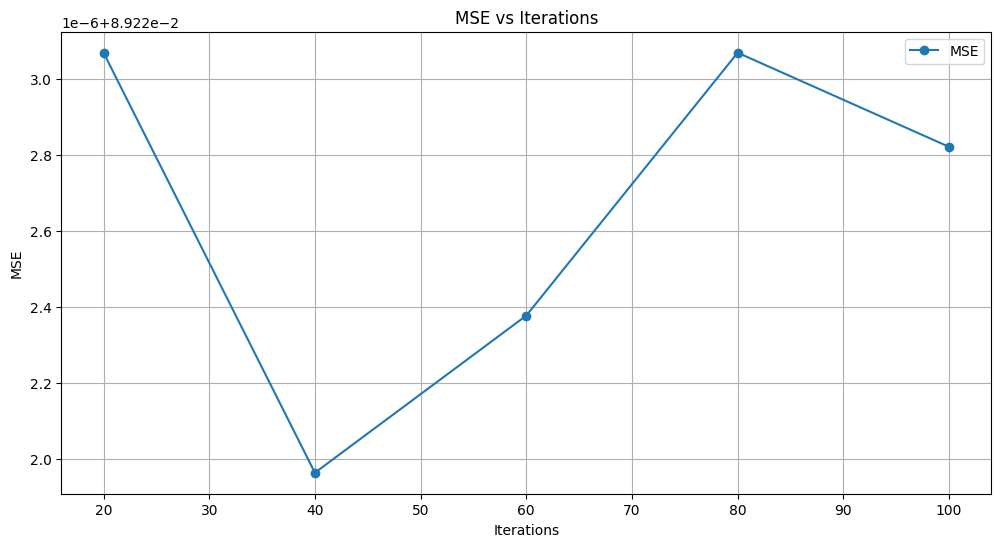

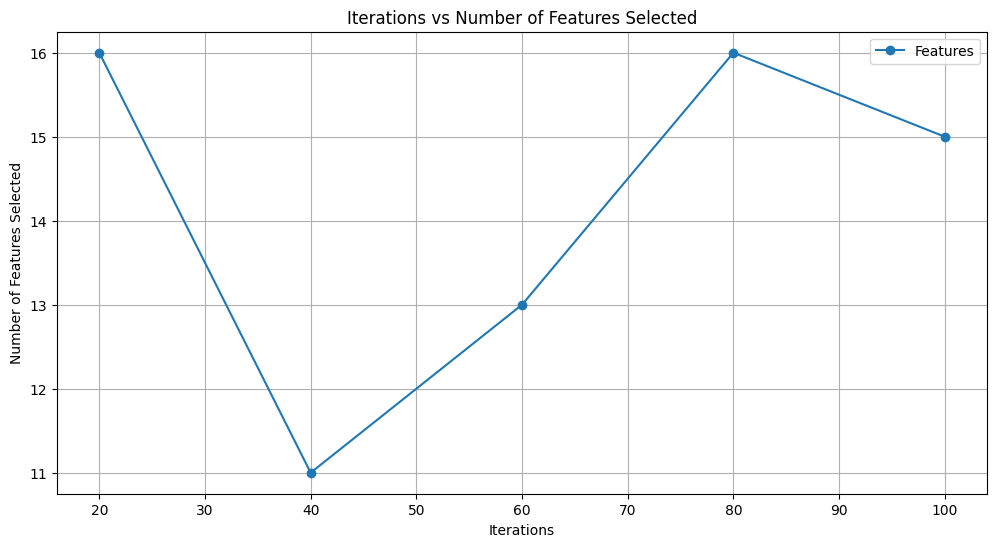

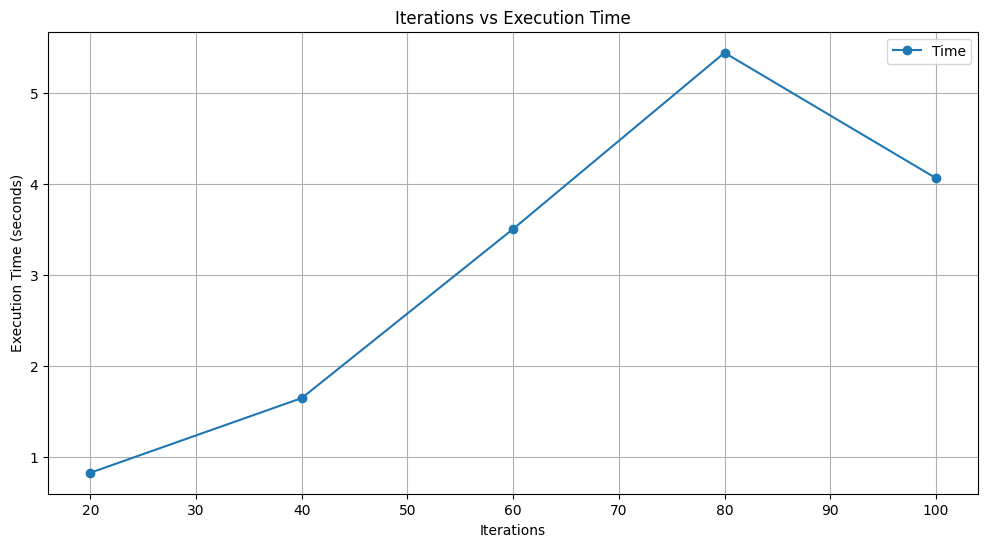

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(iterations_list, mse_values_list_gwo, marker='o', label='MSE')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs Iterations')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(iterations_list, features_selected_list_gwo, marker='o', label='Features')
plt.xlabel('Iterations')
plt.ylabel('Number of Features Selected')
plt.title('Iterations vs Number of Features Selected')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(iterations_list, execution_time_list_gwo, marker='o', label='Time')
plt.xlabel('Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Iterations vs Execution Time')
plt.legend()
plt.grid()
plt.show()

# **Combined Comparative Analysis**

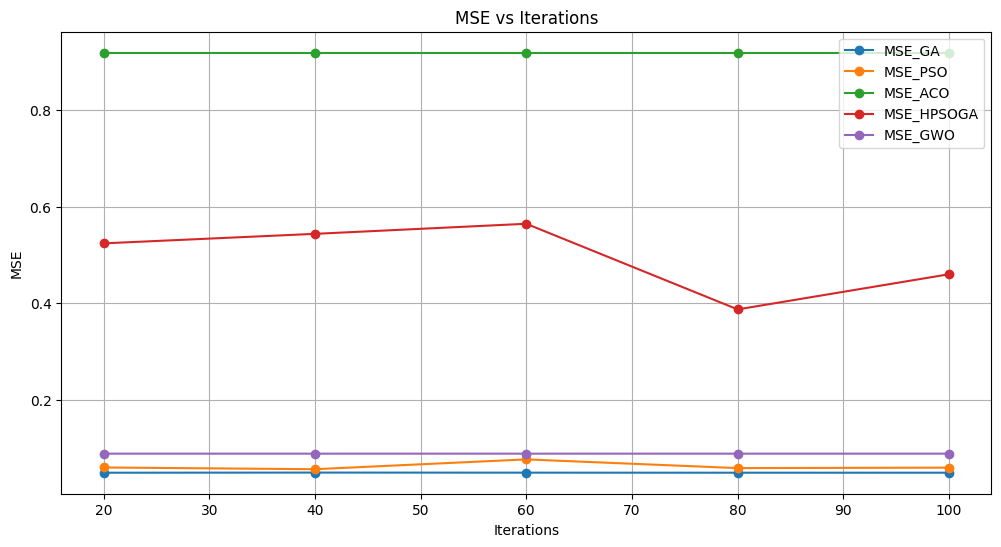

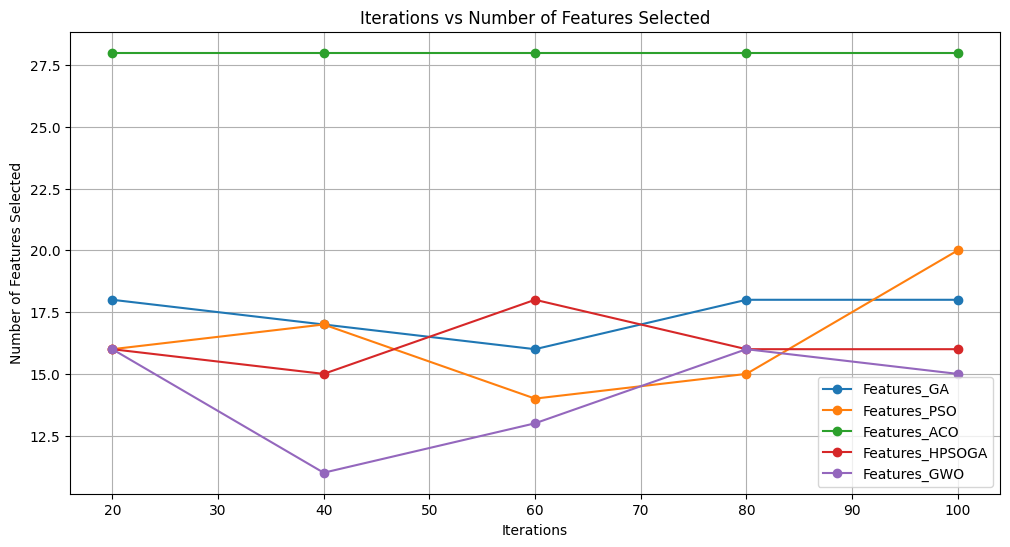

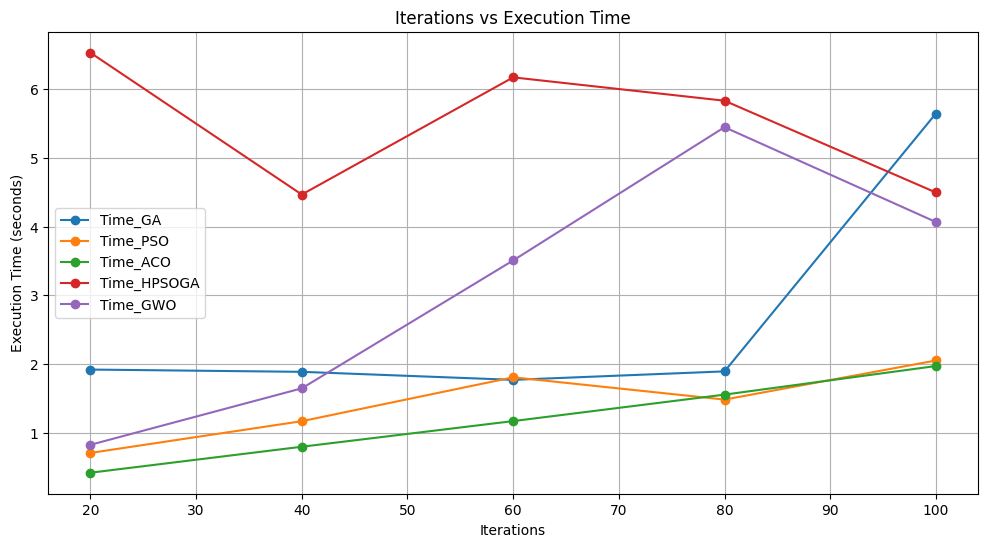

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(iterations_list, mse_list_ga, marker='o', label='MSE_GA')
plt.plot(iterations_list, mse_list_pso, marker='o', label='MSE_PSO')
plt.plot(iterations_list, best_accuracy_list_aco, marker='o', label='MSE_ACO')
plt.plot(iterations_list, mse_list_hpsoga, marker='o', label='MSE_HPSOGA')
plt.plot(iterations_list, mse_values_list_gwo, marker='o', label='MSE_GWO')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE vs Iterations')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(iterations_list, feature_count_ga, marker='o', label='Features_GA')
plt.plot(iterations_list, selected_features_counts_pso, marker='o', label='Features_PSO')
plt.plot(iterations_list, selected_features_counts_aco, marker='o', label='Features_ACO')
plt.plot(iterations_list, selected_features_counts_hpsoga, marker='o', label='Features_HPSOGA')
plt.plot(iterations_list, features_selected_list_gwo, marker='o', label='Features_GWO')
plt.xlabel('Iterations')
plt.ylabel('Number of Features Selected')
plt.title('Iterations vs Number of Features Selected')
plt.legend()
plt.grid()
plt.show()

print("")

plt.figure(figsize=(12, 6))
plt.plot(iterations_list, times_ga, marker='o', label='Time_GA')
plt.plot(iterations_list, execution_time_list_pso, marker='o', label='Time_PSO')
plt.plot(iterations_list, execution_time_list_aco, marker='o', label='Time_ACO')
plt.plot(iterations_list, execution_time_list_hpsoga, marker='o', label='Time_HPSOGA')
plt.plot(iterations_list, execution_time_list_gwo, marker='o', label='Time_GWO')
plt.xlabel('Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Iterations vs Execution Time')
plt.legend()
plt.grid()
plt.show()